In [1]:
# Import all the libraries you will be using
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Unzip the data set
import zipfile
with zipfile.ZipFile("Weather.zip", "r") as zip_ref:
    zip_ref.extractall("GitHub")

In [3]:
# Load data sets
df = pd.read_csv("Weather Data.csv")
df.head(10)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
5,1/1/2012 5:00,-1.4,-3.3,87,9,6.4,101.27,Fog
6,1/1/2012 6:00,-1.5,-3.1,89,7,6.4,101.29,Fog
7,1/1/2012 7:00,-1.4,-3.6,85,7,8.0,101.26,Fog
8,1/1/2012 8:00,-1.4,-3.6,85,9,8.0,101.23,Fog
9,1/1/2012 9:00,-1.3,-3.1,88,15,4.0,101.20,Fog


In [4]:
# converting columns of date and time strings into a proper datetime format
df["Date/Time"] = pd.to_datetime(df["Date/Time"])

In [5]:
df.shape

(8784, 8)

In [6]:
df.dtypes

Date/Time           datetime64[ns]
Temp_C                     float64
Dew Point Temp_C           float64
Rel Hum_%                    int64
Wind Speed_km/h              int64
Visibility_km              float64
Press_kPa                  float64
Weather                     object
dtype: object

In [7]:
df["Date/Time"]

0      2012-01-01 00:00:00
1      2012-01-01 01:00:00
2      2012-01-01 02:00:00
3      2012-01-01 03:00:00
4      2012-01-01 04:00:00
               ...        
8779   2012-12-31 19:00:00
8780   2012-12-31 20:00:00
8781   2012-12-31 21:00:00
8782   2012-12-31 22:00:00
8783   2012-12-31 23:00:00
Name: Date/Time, Length: 8784, dtype: datetime64[ns]

In [8]:
# check describtion of the data frame
df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [9]:
# check information of data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date/Time         8784 non-null   datetime64[ns]
 1   Temp_C            8784 non-null   float64       
 2   Dew Point Temp_C  8784 non-null   float64       
 3   Rel Hum_%         8784 non-null   int64         
 4   Wind Speed_km/h   8784 non-null   int64         
 5   Visibility_km     8784 non-null   float64       
 6   Press_kPa         8784 non-null   float64       
 7   Weather           8784 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 549.1+ KB


In [10]:
# Unique values found in weather column of the data frame 
weather = df["Weather"].unique()
for Weathers in weather:
    print("=>",Weathers)

=> Fog
=> Freezing Drizzle,Fog
=> Mostly Cloudy
=> Cloudy
=> Rain
=> Rain Showers
=> Mainly Clear
=> Snow Showers
=> Snow
=> Clear
=> Freezing Rain,Fog
=> Freezing Rain
=> Freezing Drizzle
=> Rain,Snow
=> Moderate Snow
=> Freezing Drizzle,Snow
=> Freezing Rain,Snow Grains
=> Snow,Blowing Snow
=> Freezing Fog
=> Haze
=> Rain,Fog
=> Drizzle,Fog
=> Drizzle
=> Freezing Drizzle,Haze
=> Freezing Rain,Haze
=> Snow,Haze
=> Snow,Fog
=> Snow,Ice Pellets
=> Rain,Haze
=> Thunderstorms,Rain
=> Thunderstorms,Rain Showers
=> Thunderstorms,Heavy Rain Showers
=> Thunderstorms,Rain Showers,Fog
=> Thunderstorms
=> Thunderstorms,Rain,Fog
=> Thunderstorms,Moderate Rain Showers,Fog
=> Rain Showers,Fog
=> Rain Showers,Snow Showers
=> Snow Pellets
=> Rain,Snow,Fog
=> Moderate Rain,Fog
=> Freezing Rain,Ice Pellets,Fog
=> Drizzle,Ice Pellets,Fog
=> Drizzle,Snow
=> Rain,Ice Pellets
=> Drizzle,Snow,Fog
=> Rain,Snow Grains
=> Rain,Snow,Ice Pellets
=> Snow Showers,Fog
=> Moderate Snow,Blowing Snow


In [11]:
wind_speed = df['Wind Speed_km/h'].nunique()
print('Wind Speed_km/h:-',wind_speed)

Wind Speed_km/h:- 34


In [12]:
# Number of unique values
df.nunique()

Date/Time           8784
Temp_C               533
Dew Point Temp_C     489
Rel Hum_%             83
Wind Speed_km/h       34
Visibility_km         24
Press_kPa            518
Weather               50
dtype: int64

In [13]:
# Count number of unique Values
df.count()

Date/Time           8784
Temp_C              8784
Dew Point Temp_C    8784
Rel Hum_%           8784
Wind Speed_km/h     8784
Visibility_km       8784
Press_kPa           8784
Weather             8784
dtype: int64

In [14]:
df["Weather"].value_counts()

Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                        

In [15]:
# Records when weather conditions where clear
df[df.Weather == "Clear"]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
67,2012-01-03 19:00:00,-16.9,-24.8,50,24,25.0,101.74,Clear
114,2012-01-05 18:00:00,-7.1,-14.4,56,11,25.0,100.71,Clear
115,2012-01-05 19:00:00,-9.2,-15.4,61,7,25.0,100.80,Clear
116,2012-01-05 20:00:00,-9.8,-15.7,62,9,25.0,100.83,Clear
117,2012-01-05 21:00:00,-9.0,-14.8,63,13,25.0,100.83,Clear
...,...,...,...,...,...,...,...,...
8646,2012-12-26 06:00:00,-13.4,-14.8,89,4,25.0,102.47,Clear
8698,2012-12-28 10:00:00,-6.1,-8.6,82,19,24.1,101.27,Clear
8713,2012-12-29 01:00:00,-11.9,-13.6,87,11,25.0,101.31,Clear
8714,2012-12-29 02:00:00,-11.8,-13.1,90,13,25.0,101.33,Clear


In [16]:
# Records when wind speed was = 7km/h
df[df["Wind Speed_km/h"]==7]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog
6,2012-01-01 06:00:00,-1.5,-3.1,89,7,6.4,101.29,Fog
7,2012-01-01 07:00:00,-1.4,-3.6,85,7,8.0,101.26,Fog
11,2012-01-01 11:00:00,-0.5,-2.1,89,7,4.0,100.98,Fog
...,...,...,...,...,...,...,...,...
8647,2012-12-26 07:00:00,-13.0,-14.4,89,7,25.0,102.46,Mainly Clear
8693,2012-12-28 05:00:00,-5.0,-6.1,92,7,25.0,101.01,Cloudy
8719,2012-12-29 07:00:00,-14.8,-16.4,88,7,8.0,101.22,Fog
8722,2012-12-29 10:00:00,-12.0,-13.3,90,7,6.4,101.15,Fog


In [17]:
wind_speed = df['Wind Speed_km/h'].nunique()
print('Wind Speed_km/h:-',wind_speed)

Wind Speed_km/h:- 34


In [18]:
df.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [19]:
# Encoding
le = LabelEncoder()
df['Weather'] = le.fit_transform(df['Weather'])

In [20]:
le

LabelEncoder()

Text(0.5, 1.0, 'Distribution of temperature')

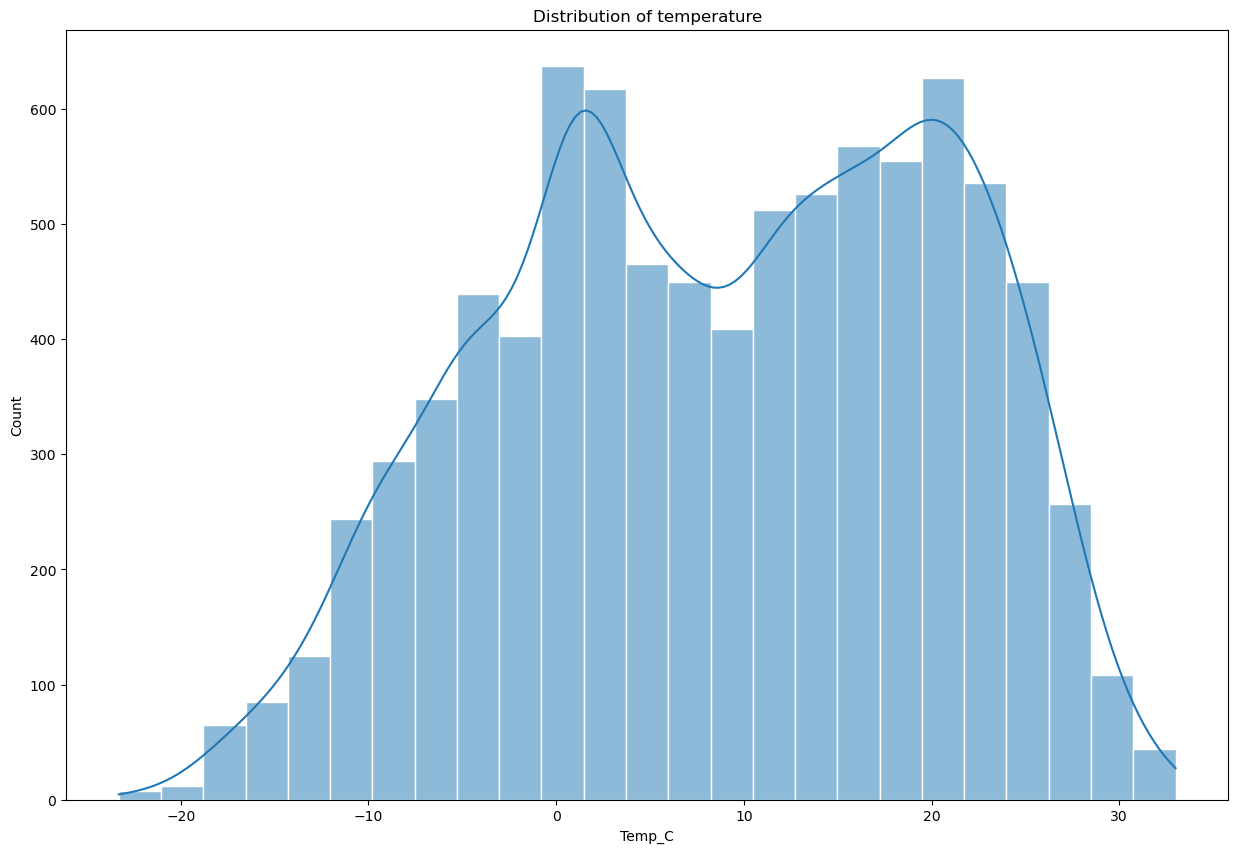

In [21]:
plt.figure(figsize=(15,10))
sns.histplot(data=df, x="Temp_C", bins = 25, edgecolor = "white", kde = True)
plt.title("Distribution of temperature")

Text(0.5, 1.0, 'Dew Point Distribution')

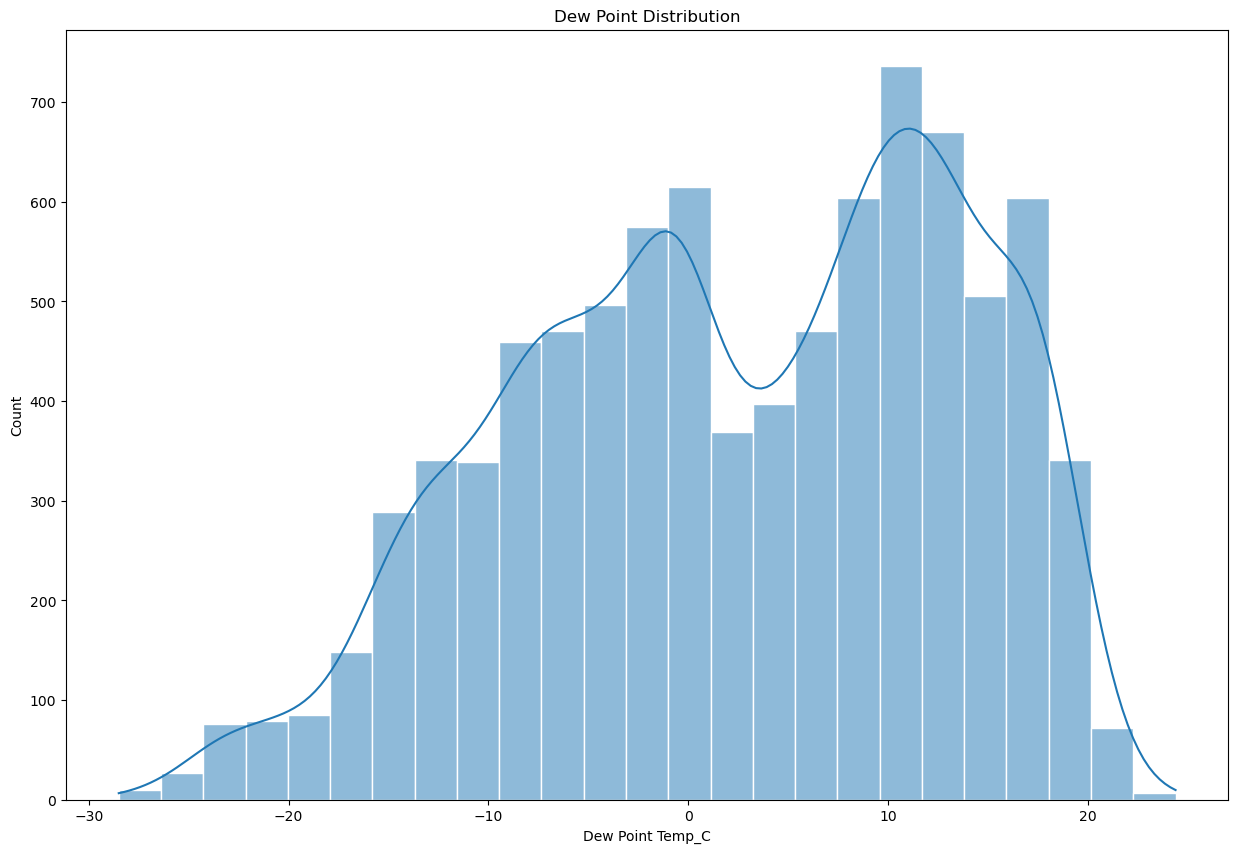

In [22]:
plt.figure(figsize=(15,10))
sns.histplot(df, x="Dew Point Temp_C", bins = 25, edgecolor = "white", kde = True)
plt.title("Dew Point Distribution")

Text(0.5, 1.0, 'humidity Distribution')

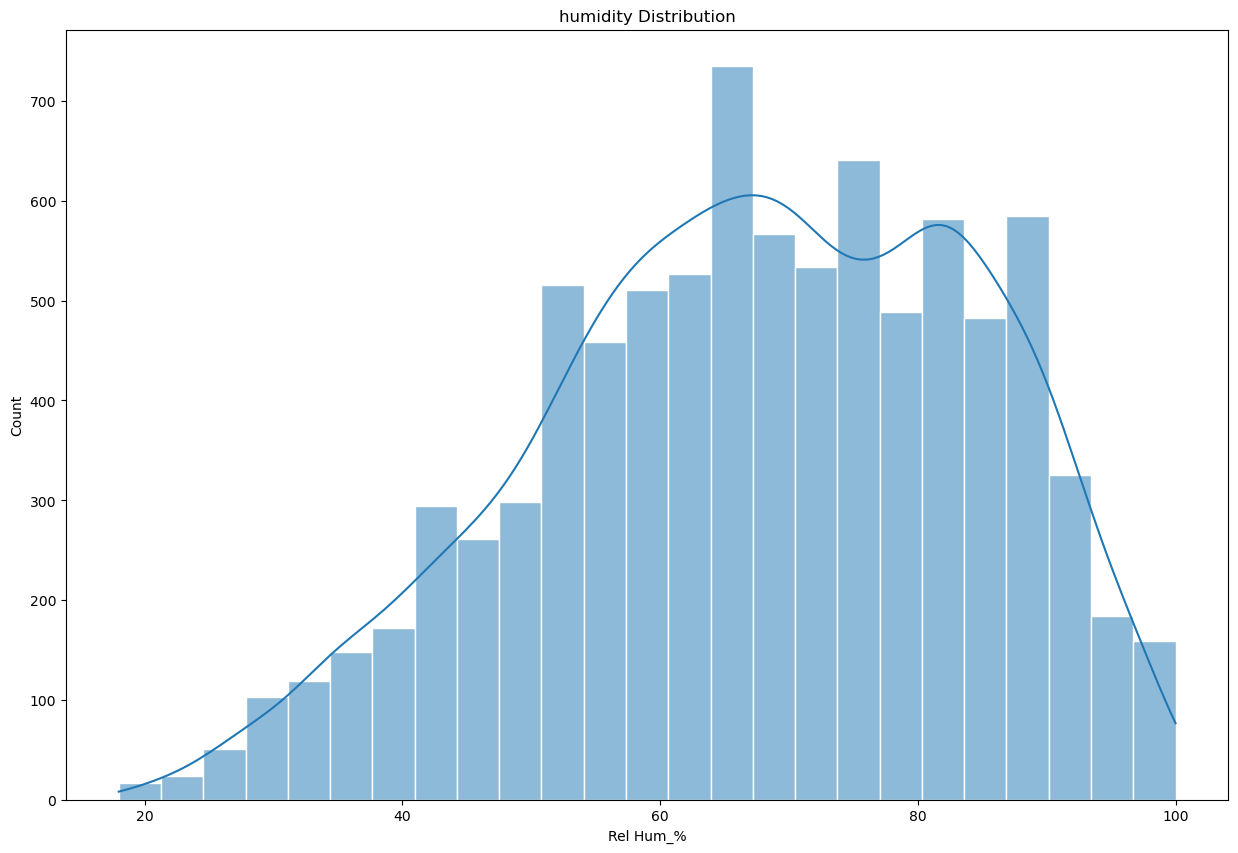

In [23]:
plt.figure(figsize=(15,10))
sns.histplot(data=df, x="Rel Hum_%", bins = 25, edgecolor = "white", kde = True)
plt.title("humidity Distribution")

# Correlation heatmap

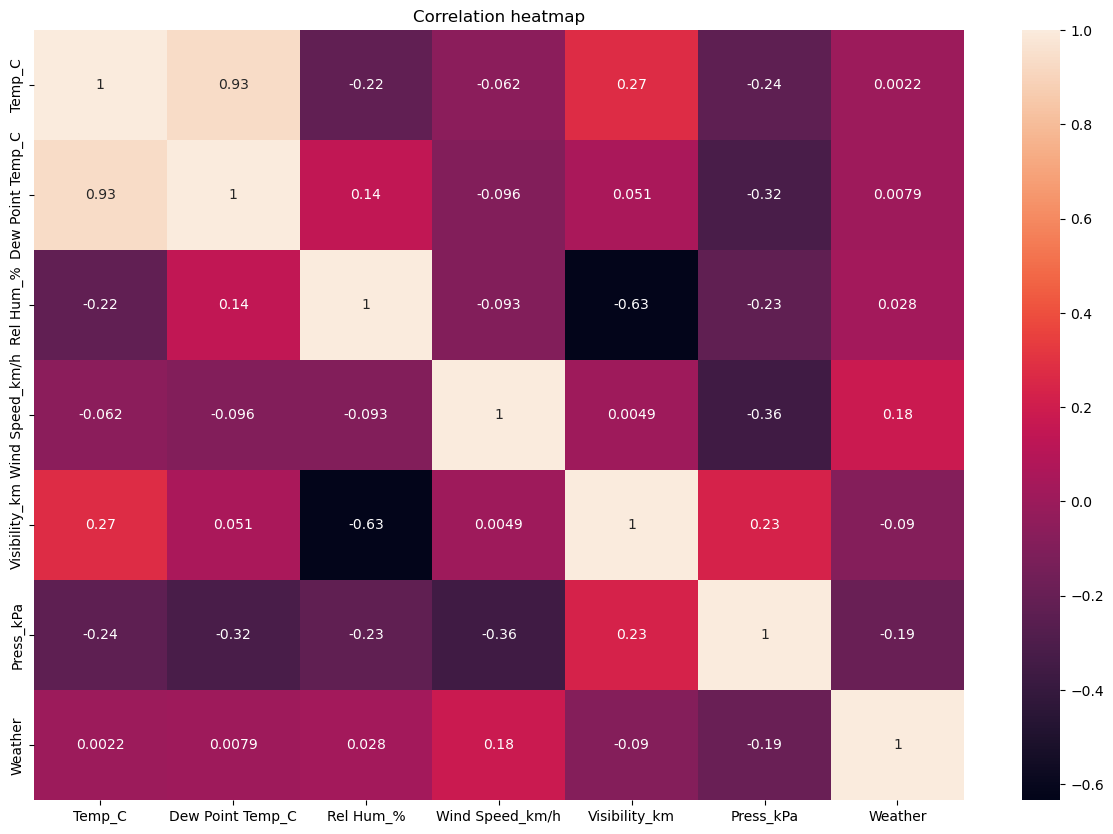

In [24]:
plt.figure(figsize = (15,10))
cor = df.corr()
sns.heatmap (cor, annot = True, )
plt.title("Correlation heatmap")
plt.show()

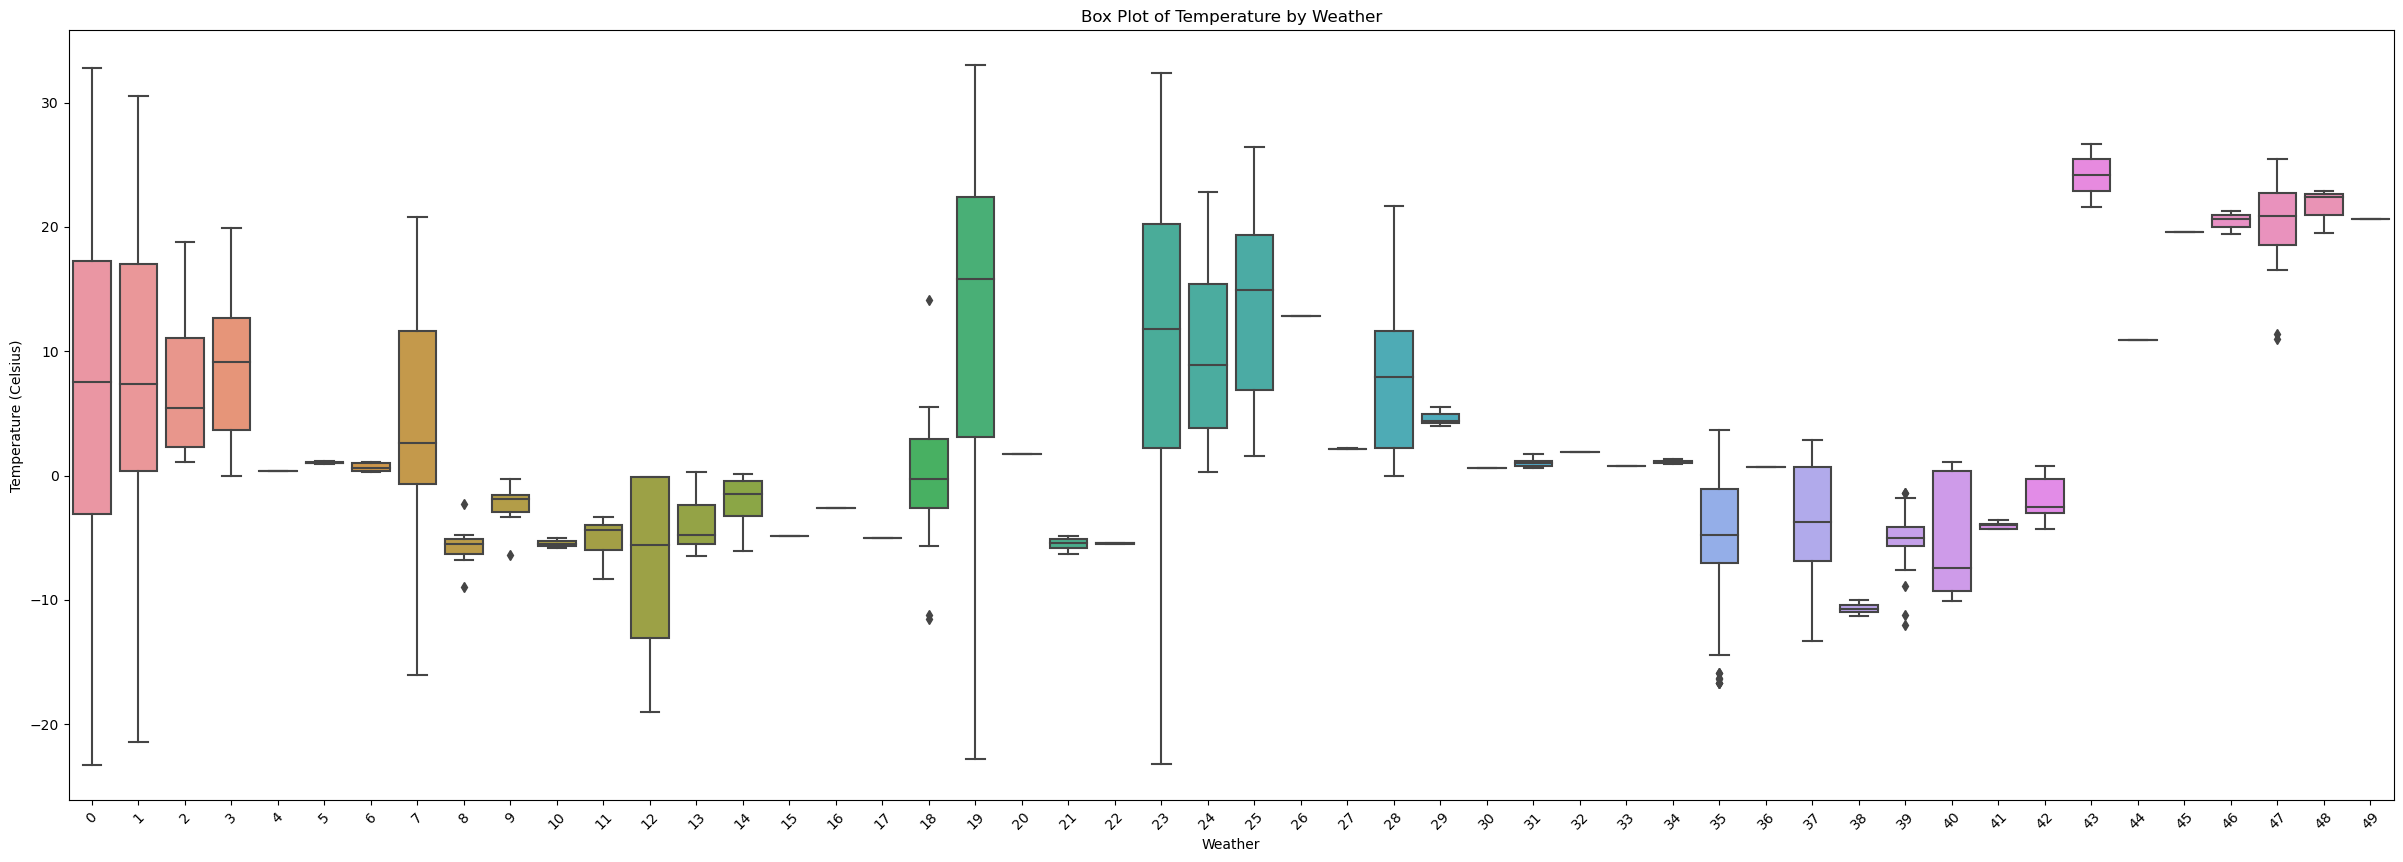

In [25]:
# bivariate analysis
#weather vs temperature
plt.figure(figsize=(30,10))
sns.boxplot(data=df, x='Weather', y='Temp_C')
plt.xticks(rotation=45)
plt.title('Box Plot of Temperature by Weather')
plt.xlabel('Weather')
plt.ylabel('Temperature (Celsius)')
plt.show()

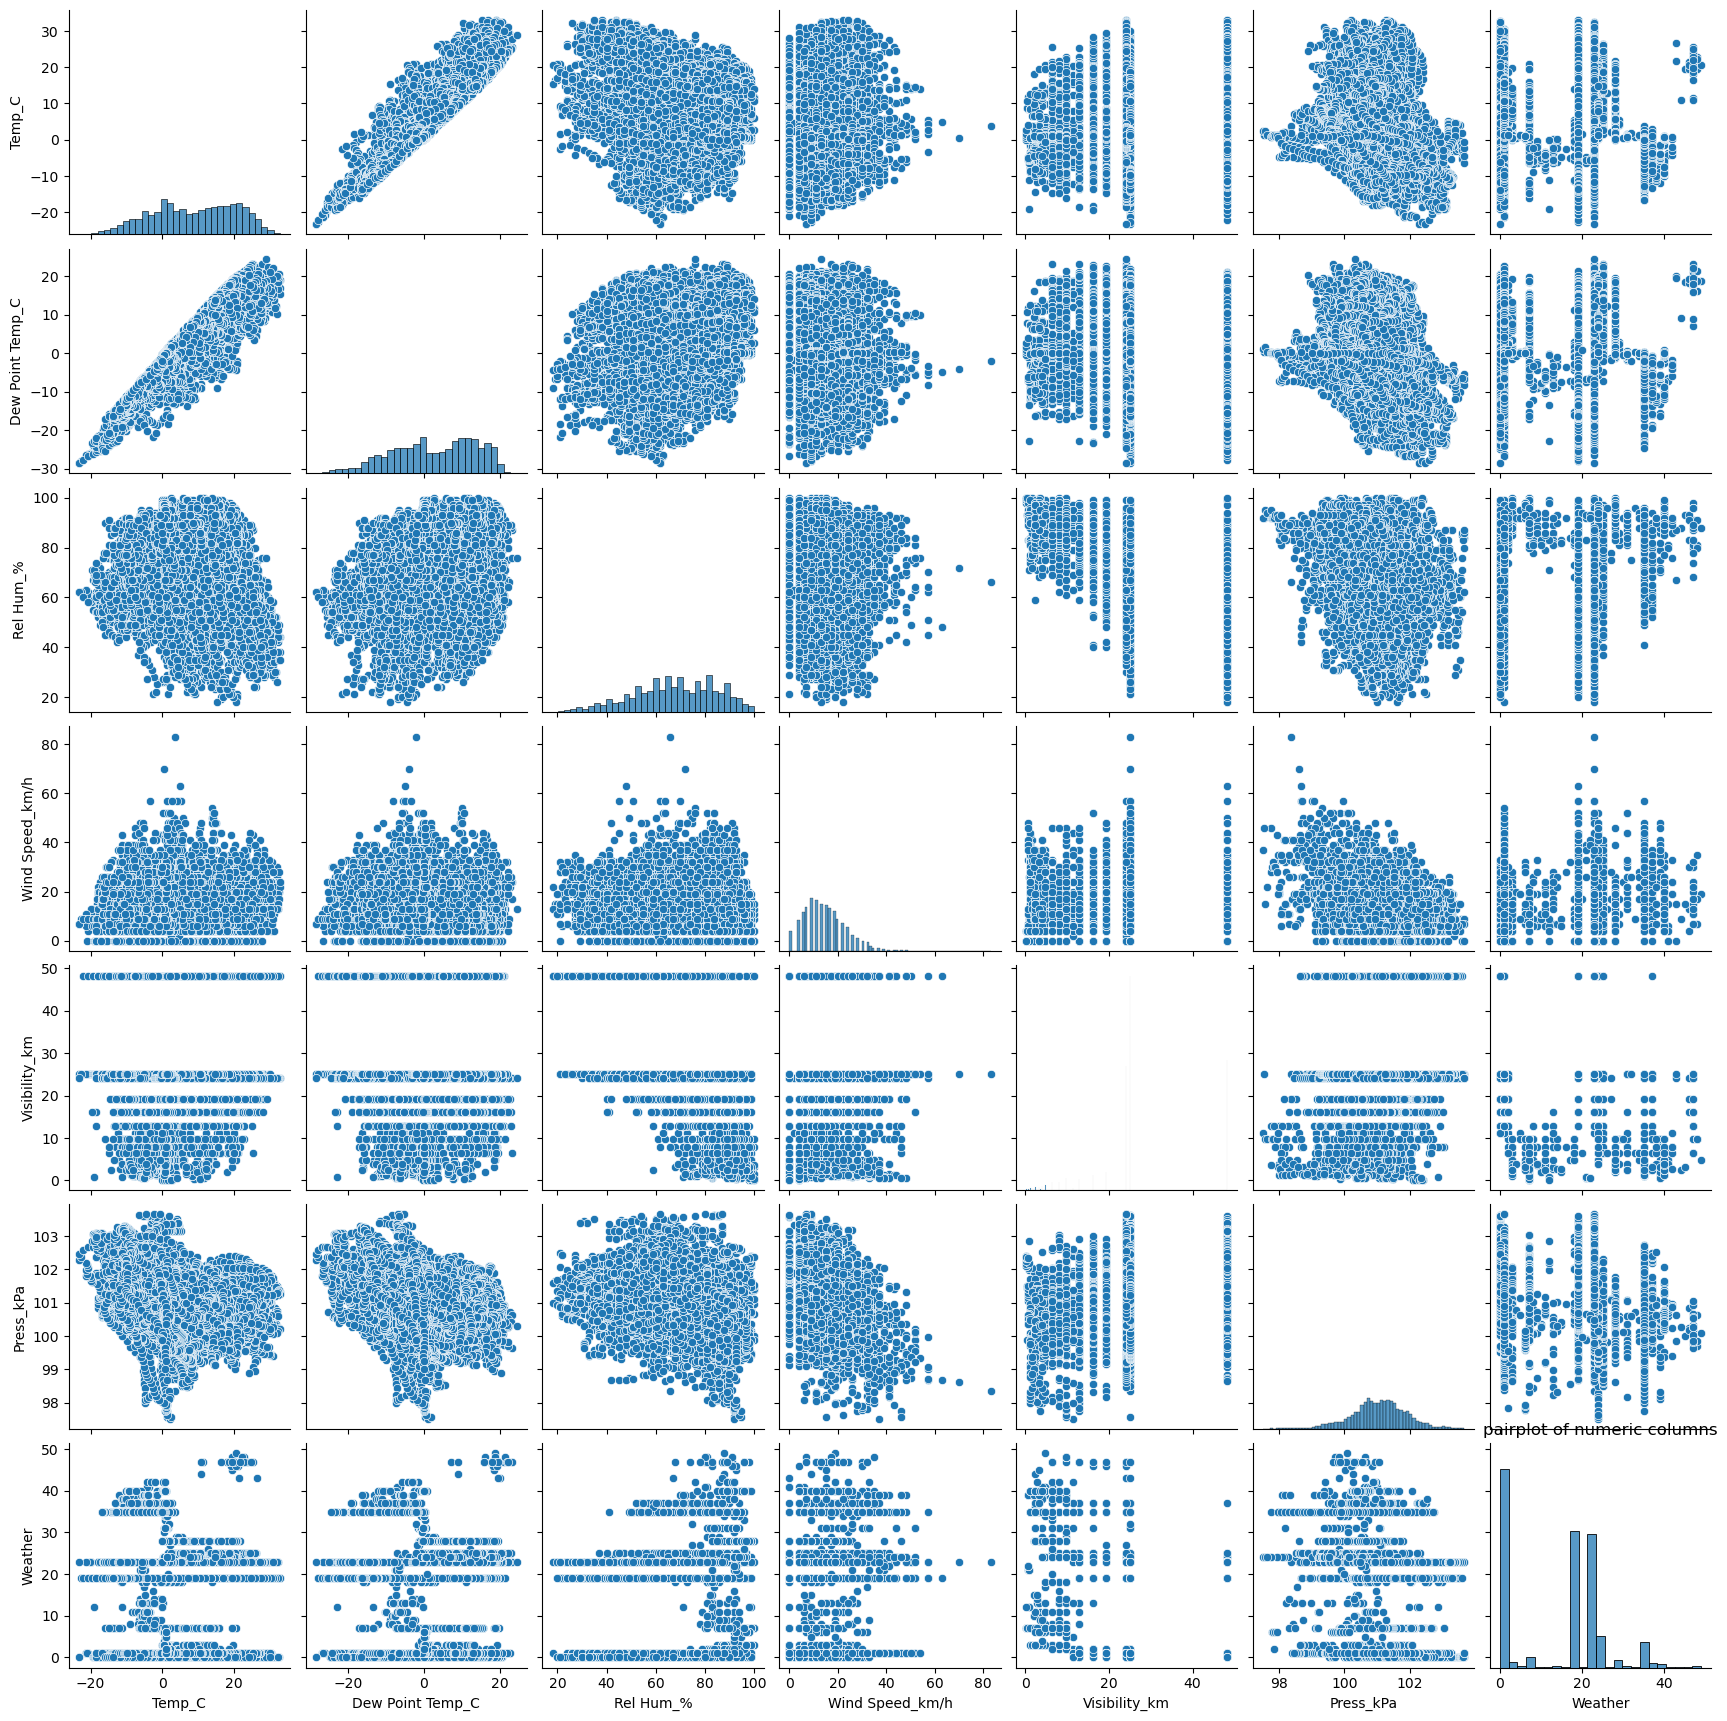

In [26]:
# pairplot
sns.pairplot(df)
plt.title("pairplot of numeric columns")
plt.show()

Text(0.5, 1.0, 'temperature variation')

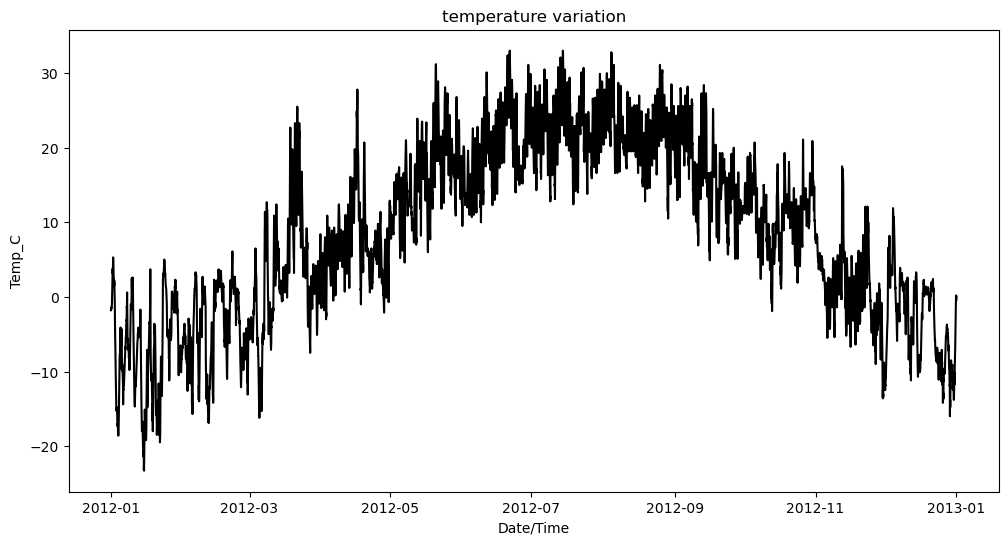

In [27]:
# temperature analysis over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date/Time', y='Temp_C', color = "black")
plt.title("temperature variation")

Text(0.5, 1.0, 'count of various weather conditions')

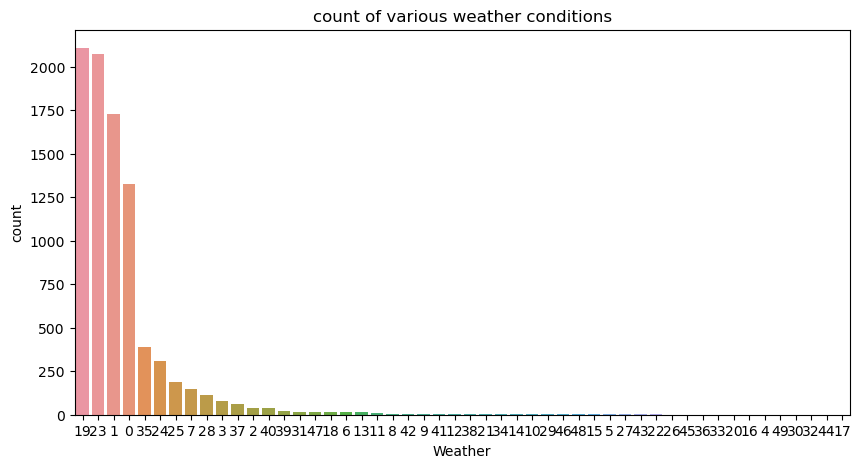

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(df, x ="Weather", order= df["Weather"].value_counts().index)
plt.title("count of various weather conditions")

In [29]:
df['Month'] = df['Date/Time'].dt.month
monthly_avg_temp = df.groupby('Month')['Temp_C'].mean()

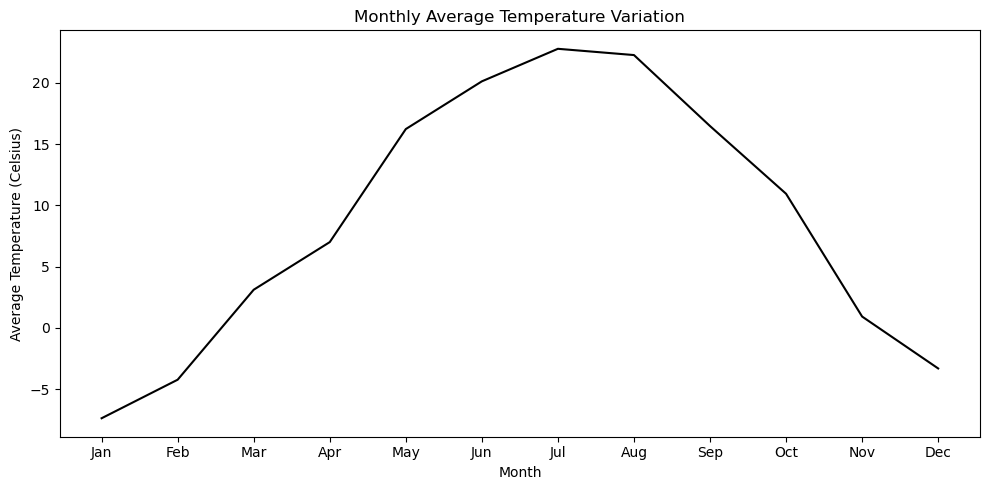

In [30]:
plt.figure(figsize=(10,5))
sns.lineplot(x=monthly_avg_temp.index,color = "black", y=monthly_avg_temp.values)
plt.title('Monthly Average Temperature Variation')
plt.xlabel('Month')
plt.ylabel('Average Temperature (Celsius)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Wind Speed vs. Visibility')

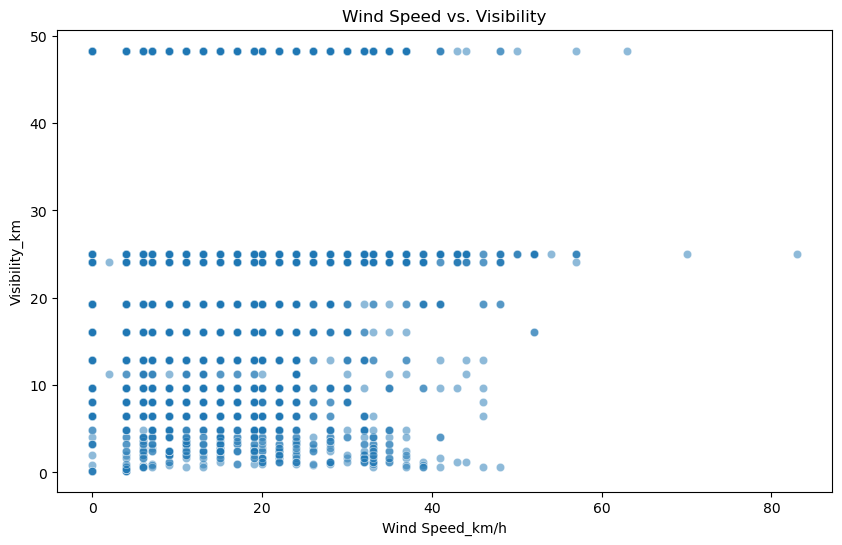

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Wind Speed_km/h', y='Visibility_km', alpha=0.5)
plt.title('Wind Speed vs. Visibility')

Text(0.5, 1.0, 'humidity Distribution')

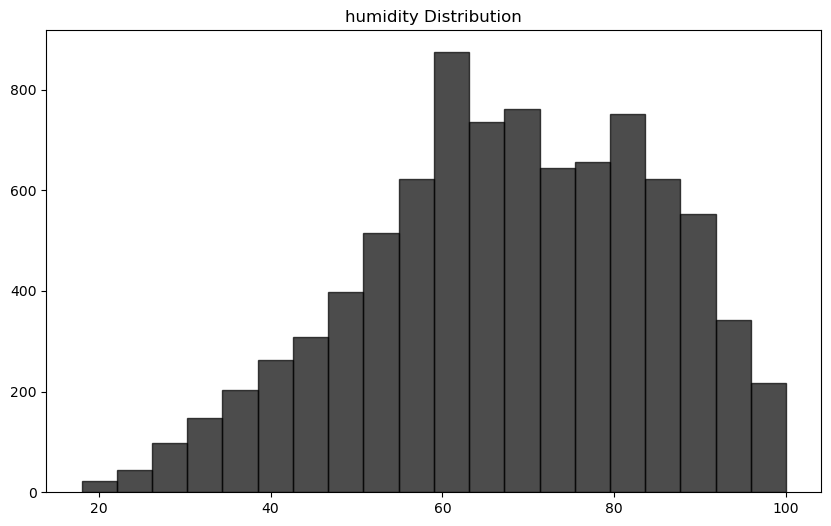

In [32]:
plt.figure(figsize=(10, 6))
plt.hist(df['Rel Hum_%'], bins=20, color='black', edgecolor="black", alpha=0.7)
plt.title("humidity Distribution")

In [33]:
df.cov()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Month
Temp_C,136.606604,118.641308,-43.540073,-6.283660,40.343485,-2.331894,0.301468,8.796046
Dew Point Temp_C,118.641308,118.441263,25.684917,-9.047958,6.980371,-2.944971,0.984853,11.255154
Rel Hum_%,-43.540073,25.684917,286.248550,-13.633521,-135.330500,-3.304649,5.505069,13.549835
Wind Speed_km/h,-6.283660,-9.047958,-13.633521,75.493440,0.535508,-2.615151,17.860188,-0.914831
Visibility_km,40.343485,6.980371,-135.330500,0.535508,159.332259,2.470011,-13.070212,-1.189956
Press_kPa,-2.331894,-2.944971,-3.304649,-2.615151,2.470011,0.712344,-1.813825,0.204947
Weather,0.301468,0.984853,5.505069,17.860188,-13.070212,-1.813825,132.075847,-0.502494
Month,8.796046,11.255154,13.549835,-0.914831,-1.189956,0.204947,-0.502494,11.912372


In [34]:
X = df.drop(['Temp_C', 'Date/Time'], axis=1)  # Excluding 'Date/Time' as a feature
y = df['Temp_C']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
model = LinearRegression()

In [37]:
model.fit(X_train,y_train)

LinearRegression()

In [38]:
print(model.intercept_)
print(model.coef_)

34.34887817748326
[ 1.04900749 -0.25079511 -0.00684975 -0.00390499 -0.11270177  0.00435695
  0.03270511]


In [39]:
print(model.score(X_train, y_train))

0.9951921470905176


In [40]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Regression': SVR()}

results = {}

In [41]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

In [42]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
score = r2_score(y_pred, y_test)
mae =mean_absolute_error(y_pred,y_test)
mse =mean_squared_error(y_pred,y_test)
rmse = np.sqrt(mse)

In [45]:
# Results
print("Score =", score)
print("Mean Absolute Error =",mae)
print("Mean Square Error =",mse)
print("Root Mean Squared Error =",rmse)

Score = 0.9986084651612213
Mean Absolute Error = 0.27954566673977826
Mean Square Error = 0.1963587396509215
Root Mean Squared Error = 0.4431238423408534
